# The MNIST Dataset of Handwritten Digits
This database contains 60,000 handwritten digits in the training set and around 10,000 handwritten digits in the test set in 28x28 resolution. <br>
The database can be found [**here**](http://yann.lecun.com/exdb/mnist/).
<br>
We will be training a Convolutional Neural Network (CNN) to predict the class of digits (i.e 0 - 9) using Keras library in Python.

## Table of Contents
1. [Importing modules and the dataset](#1)
2. [Some Exploratory Data Analysis](#2)
3. [Normalization](#3)
4. [Model training](#4)
5. [Conclusion](#5)

<div id='1'></div>

<br>

### **1. Importing modules and dataset**

In [1]:
# Set up
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# ML
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(f'Shape of training dataset is: {X_train.shape} , {y_train.shape}')
print(f'Shape of testing dataset is: {X_test.shape} , {y_test.shape}')

Shape of training dataset is: (60000, 28, 28) , (60000,)
Shape of testing dataset is: (10000, 28, 28) , (10000,)


<br>

Reshaping the data first and creating the data first, in order to perform some EDA.

In [4]:
train = pd.DataFrame(data = np.reshape(X_train, (60000, 28*28)),
                     index = [i for i in range(X_train.shape[0])],
                     columns = ['pixel' + str(i) for i in range(X_train.shape[1]*X_train.shape[2])])

train['label'] = y_train

train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


<div id='2'></div>

<br>

### **2. Some Exploratory Data Analysis**

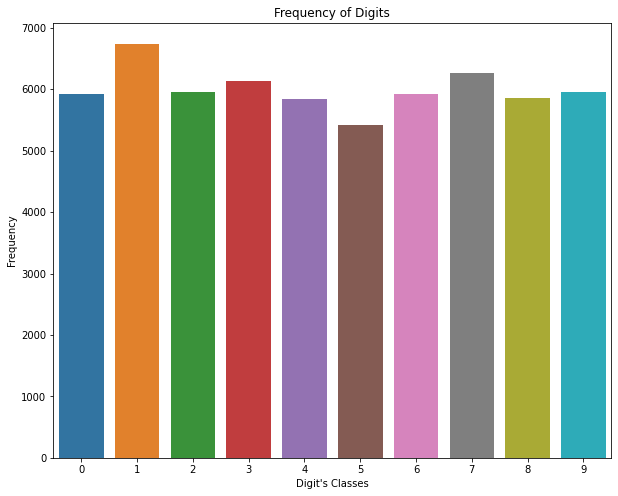

In [5]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'label',data = train)

plt.xlabel("Digit's Classes")
plt.ylabel('Frequency')
plt.title('Frequency of Digits')
plt.show()

The data seems to be balanced.

<br>

Plotting some samples,

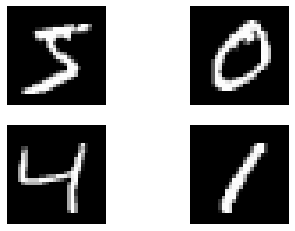

In [6]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    img = X_train[i]
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    
plt.show()

<div id='3'></div>

<br>

### **3. Normalization**
- Colors take value from 0 - 255 (in RGB), but to apply CNN its much better to make them 0 - 1. That is, making them grayscale.
- We need to include an extra dimension in the imageset i.e. 28x28x1. As Keras requires an extra dimension in the end to correspond the channels.
- Finally, encoding our labels.

In [7]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0 
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')

Shape of X_train : (60000, 28, 28)
Shape of X_test : (10000, 28, 28)


In [8]:
# Reshaping 
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')

Shape of X_train : (60000, 28, 28, 1)
Shape of X_test : (10000, 28, 28, 1)


In [9]:
# Encoding 
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

<div id='4'></div>

<br>

### **4. Model Training**

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout

In [11]:
model = Sequential()
model.add(Conv2D(128, 5, padding="Same", activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(128, 5, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))

model.add(Conv2D(64, 3, padding="Same", activation="relu"))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))

model.add(Conv2D(32, 3, padding="Same", activation="relu"))
model.add(Conv2D(16, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))

model.add(Flatten())

model.add(Dense(1000, activation="relu"))
model.add(Dense(500, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       409728    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

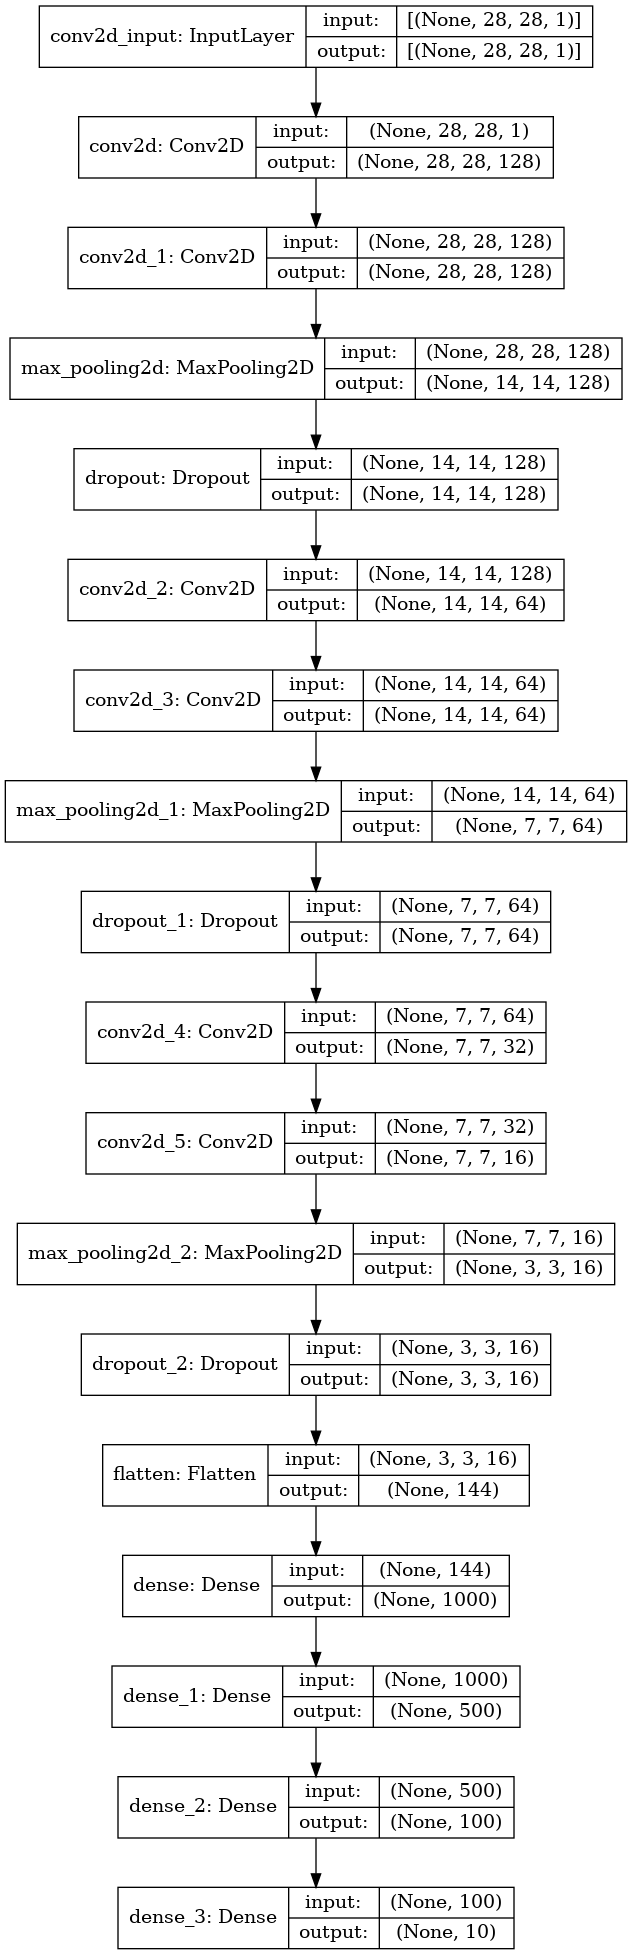

In [12]:
from keras.utils import plot_model 
plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True)

from IPython.display import Image
Image('model.png')

In [13]:
model.compile(optimizer = "SGD", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [14]:
hist = model.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 20s 7ms/step - loss: 2.1430 - accuracy: 0.2003
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4785 - accuracy: 0.8527
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2534 - accuracy: 0.9219
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1865 - accuracy: 0.9429
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1568 - accuracy: 0.9532
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1340 - accuracy: 0.9593
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1160 - accuracy: 0.9645
Epoch 8/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1085 - accuracy: 0.9672
Epoch 9/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0957 - accuracy: 0.9707
Epoch 10/50
1875/1875 [==============================] - 12s 7ms/step - l

I trained the model using a GPU (accelerator) on Kaggle, using this it took around 13 seconds per epoch, i.e. model took around 10 minutes to train. 
<br>
<br>

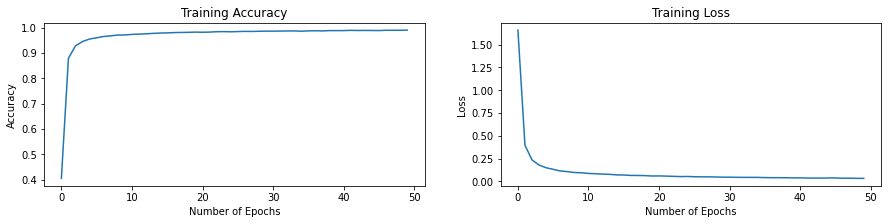

In [15]:
plt.figure(figsize = (15, 3))

plt.subplot(1, 2, 1)
plt.plot(hist.history["accuracy"])
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")

plt.subplot(1, 2, 2)
plt.plot(hist.history["loss"])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")

plt.show()

In [16]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_pred, y_test)

print(f'The accuracy of the trained CNN is: {accuracy}')

The accuracy of the trained CNN is: 0.9944


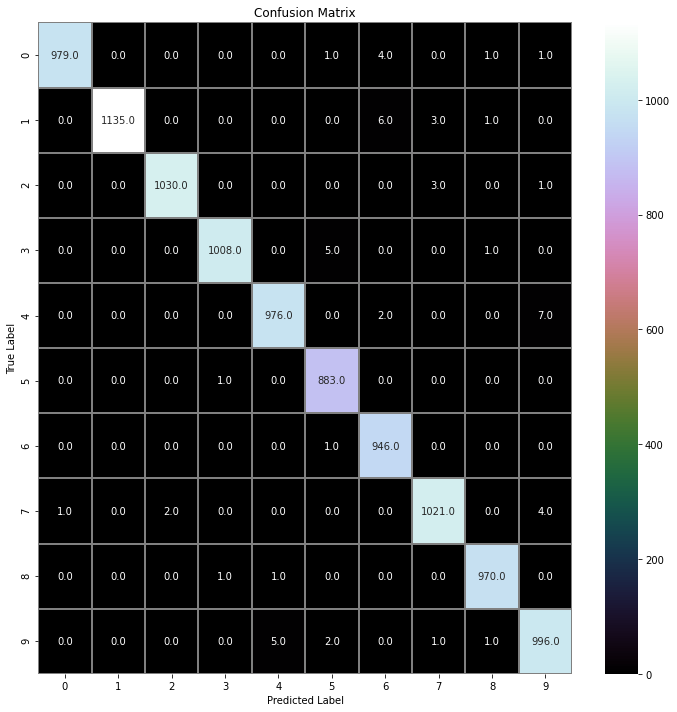

In [17]:
conf_mat_cnn = confusion_matrix(y_pred, y_test)

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat_cnn, annot=True, linewidths=0.01,cmap="cubehelix",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.show()

<div id='5'></div>

<br>

### **5. Conclusion**
We trained a Convolutional Neural Network, and achieved 99.44% accuracy on the test set.